# Breast Cancer Project – EDA

## 1. Initial imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

## 2. Loading data

In [4]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

## 3. Exploration
- Data types
- Missing values
- Balancing of target variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

In [9]:
df.describe(include='O')

diagnosis
count        569
unique         2
top            B
freq         357

<Axes: title={'center': 'Class Distribution'}, xlabel='diagnosis'>

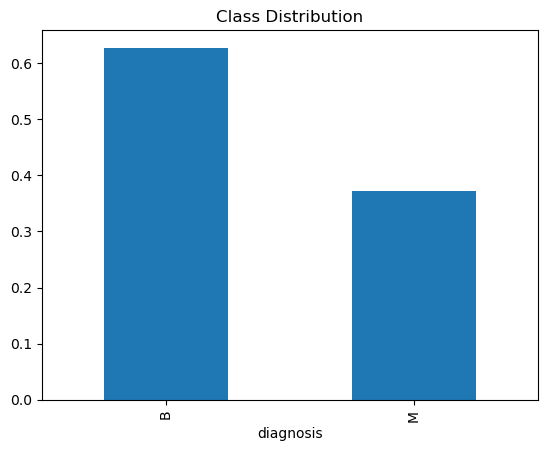

In [5]:
df['diagnosis'].value_counts(normalize=True).plot(kind='bar', title='Class Distribution')

In [6]:
# stardarlising column names and dropping Unnamed: 32

# new
df['concave_points_worst'] = df['concave points_worst']
df['concave_points_se'] = df['concave points_se']
df['concave_points_mean'] = df['concave points_mean']

#drop
df = df.drop(columns=['concave points_worst', 'concave points_se', 'concave points_mean', 'Unnamed: 32'])

## 4. Visualization
- Scatterplots
- Boxplots
- Heatmaps
- Distribution
- VIF

In [35]:
pd.DataFrame(df.isnull().sum().sort_values(ascending = False)).head(40)

0
Unnamed: 32              569
id                         0
concavity_se               0
concave_points_se          0
concave_points_worst       0
fractal_dimension_worst    0
symmetry_worst             0
concavity_worst            0
compactness_worst          0
smoothness_worst           0
area_worst                 0
perimeter_worst            0
texture_worst              0
radius_worst               0
fractal_dimension_se       0
symmetry_se                0
compactness_se             0
diagnosis                  0
smoothness_se              0
area_se                    0
perimeter_se               0
texture_se                 0
radius_se                  0
fractal_dimension_mean     0
symmetry_mean              0
concavity_mean             0
compactness_mean           0
smoothness_mean            0
area_mean                  0
perimeter_mean             0
texture_mean               0
radius_mean                0
concave_points_mean        0

### 4.1) Scatterplots

Storing all outliers under `outliers`

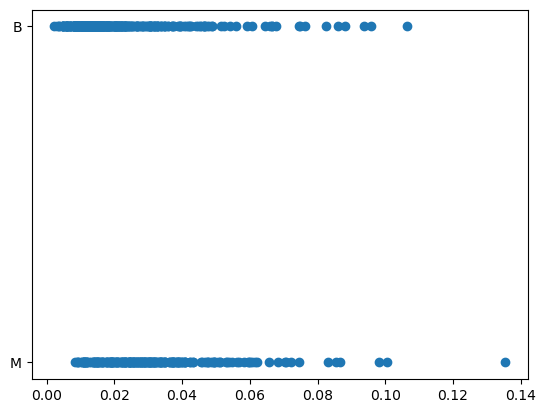

In [11]:
plt.scatter(x='compactness_se', y='diagnosis', data=df)

In [7]:
outliers = []

df.query('compactness_se > 0.12')
#874858

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
190  874858         M        14.22         23.12           94.37      609.9   

     smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
190           0.1075            0.2413          0.1981         0.2384   

     fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
190                 0.07542      0.286        2.11         2.112    31.72   

     smoothness_se  compactness_se  concavity_se  symmetry_se  \
190        0.00797          0.1354        0.1166      0.05113   

     fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
190               0.01172         15.74          37.18            106.4   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
190       762.4            0.1533             0.9327           0.8488   

     symmetry_worst  fractal_dimension_worst  concave_points_worst  \
190          0.5166                   0.1446                0.1772   

     concave_points_se  concave_points_mean  
190            0.01666              0.06618

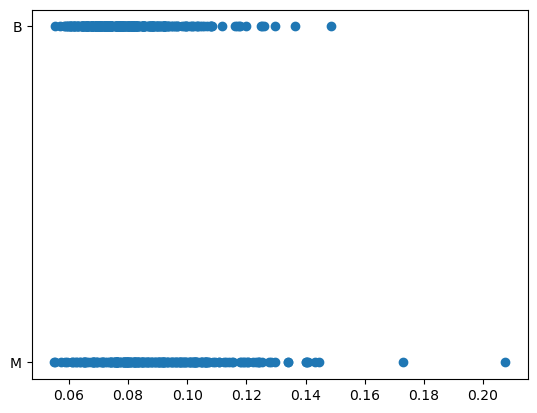

In [14]:
plt.scatter(x='fractal_dimension_worst', y='diagnosis', data=df)

In [119]:
df.query('fractal_dimension_worst > 0.15')
#84348301, 84501001

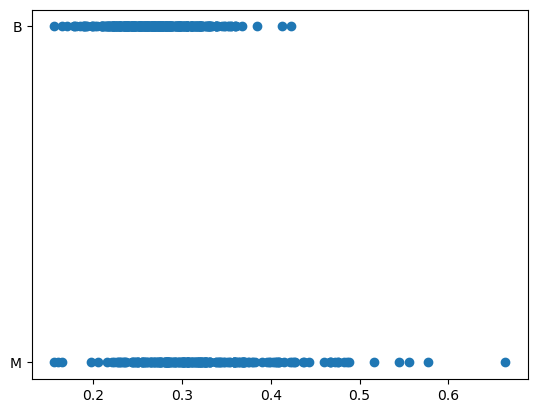

In [16]:
plt.scatter(x='symmetry_worst', y='diagnosis', data=df)

In [52]:
df.query('symmetry_worst > 0.6')
#84348301

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
3  84348301         M        11.42         20.38           77.58      386.1   

   smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
3           0.1425            0.2839          0.2414         0.2597   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
3                 0.09744     0.4956       1.156         3.445    27.23   

   smoothness_se  compactness_se  concavity_se  symmetry_se  \
3        0.00911         0.07458       0.05661      0.05963   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
3              0.009208         14.91           26.5            98.87   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
3       567.7            0.2098             0.8663           0.6869   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  concave_points_worst  \
3          0.6638                    0.173          NaN                0.2575   

   concave_points_se  concave_points_mean  
3            0.01867               0.1052

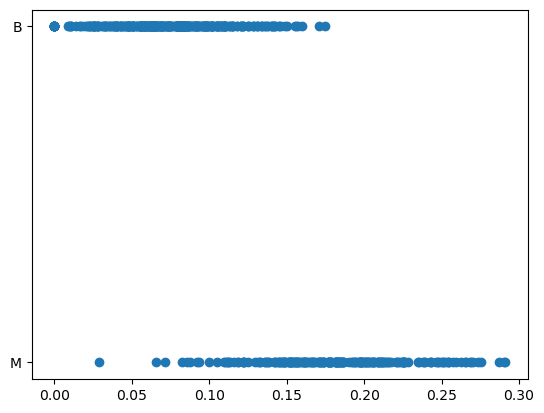

In [29]:
plt.scatter(x='concave_points_worst', y='diagnosis', data=df)

In [121]:
df.query('concave_points_worst > 0.28')
#8611555, 86355, 873593

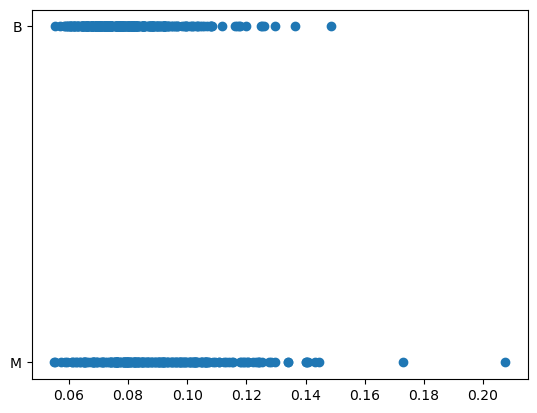

In [30]:
plt.scatter(x='fractal_dimension_worst', y='diagnosis', data=df)

In [123]:
df.query('fractal_dimension_worst > 0.2')
#84501001

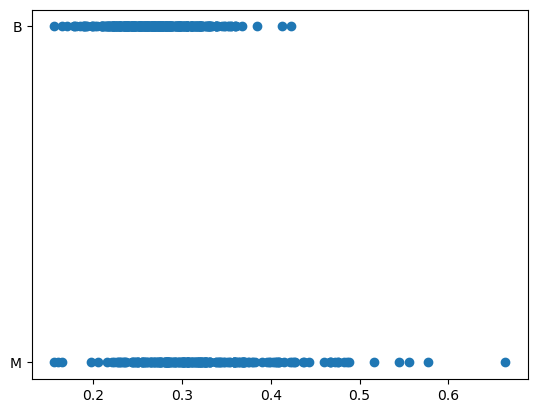

In [36]:
plt.scatter(x='symmetry_worst', y='diagnosis', data=df)

In [124]:
df.query('symmetry_worst > 0.6')
#84348301

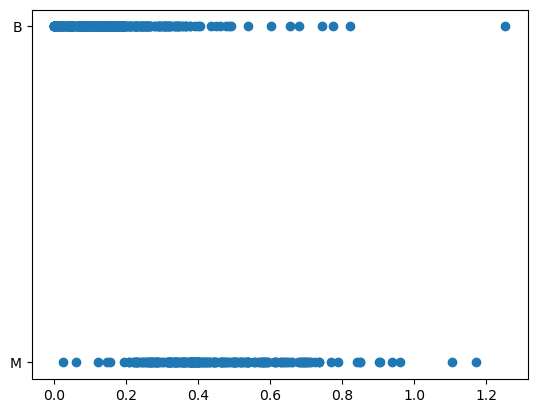

In [39]:
plt.scatter(x='concavity_worst', y='diagnosis', data=df)

In [128]:
df.query('concavity_worst > 1.1')
#859471, 84501001, 925622

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
9    84501001         M       12.460         24.04           83.97      475.9   
68     859471         B        9.029         17.33           58.79      250.5   
562    925622         M       15.220         30.62          103.40      716.9   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
9             0.1186            0.2396          0.2273              0.08543   
68            0.1066            0.1413          0.3130              0.04375   
562           0.1048            0.2087          0.2550              0.09429   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
9           0.2030                 0.08243     0.2976       1.599   
68          0.2111                 0.08046     0.3274       1.194   
562         0.2128                 0.07152     0.2602       1.205   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
9           2.039    23.94       0.007149         0.07217       0.07743   
68          1.885    17.67       0.009549         0.08606       0.30380   
562         2.362    22.65       0.004625         0.04844       0.07359   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
9        0.01789              0.010080         15.09          40.68   
68       0.04197              0.009559         10.31          22.65   
562      0.02137              0.006142         17.52          42.79   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
9              97.65       711.4            0.1853             1.0580   
68             65.50       324.7            0.1482             0.4365   
562           128.70       915.0            0.1417             0.7917   

     concavity_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32  \
9              1.105          0.4366                   0.2075          NaN   
68             1.252          0.4228                   0.1175          NaN   
562            1.170          0.4089                   0.1409          NaN   

     concave_points_worst  concave_points_se  
9                  0.2210            0.01432  
68                 0.1750            0.03322  
562                0.2356            0.01608

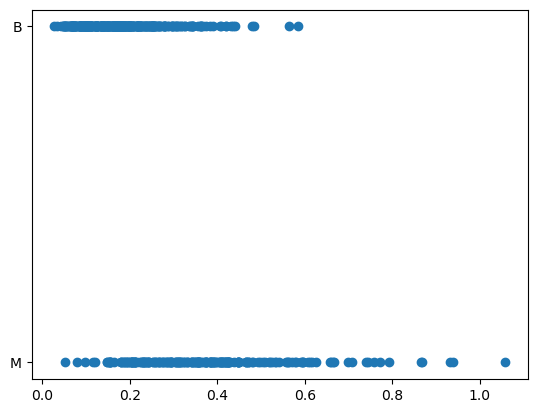

In [42]:
plt.scatter(x='compactness_worst', y='diagnosis', data=df)

In [130]:
df.query('compactness_worst > 1')
#84501001


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
9           0.1186            0.2396          0.2273              0.08543   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
9          0.203                 0.08243     0.2976       1.599         2.039   

   area_se  smoothness_se  compactness_se  concavity_se  symmetry_se  \
9    23.94       0.007149         0.07217       0.07743      0.01789   

   fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
9               0.01008         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
9       711.4            0.1853              1.058            1.105   

   symmetry_worst  fractal_dimension_worst  Unnamed: 32  concave_points_worst  \
9          0.4366                   0.2075          NaN                 0.221   

   concave_points_se  
9            0.01432

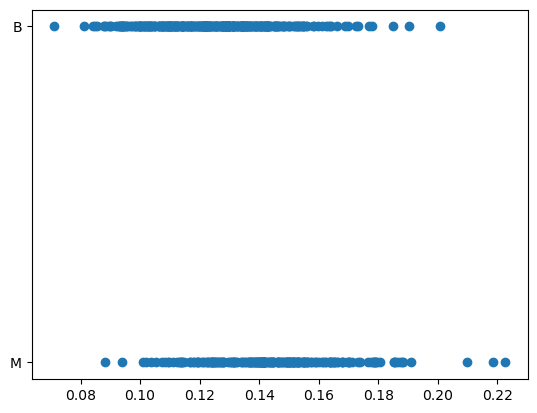

In [44]:
plt.scatter(x='smoothness_worst', y='diagnosis', data=df)

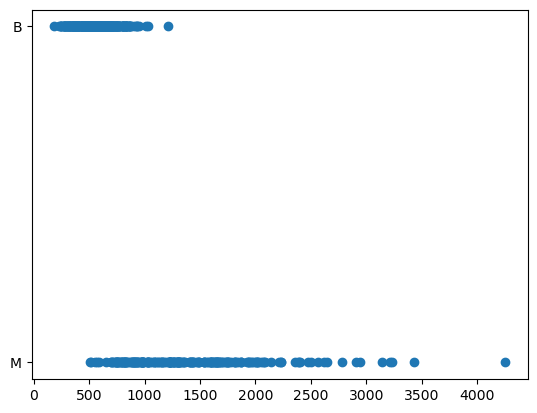

In [45]:
plt.scatter(x='area_worst', y='diagnosis', data=df)

In [17]:
df.query('area_worst > 2500')
#get rid of all MAYBE

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
23      851509         M        21.16         23.04           137.2   
82     8611555         M        25.22         24.91           171.5   
180     873592         M        27.22         21.87           182.1   
236   88299702         M        23.21         26.97           153.5   
265   88995002         M        20.73         31.12           135.7   
339      89812         M        23.51         24.27           155.1   
352     899987         M        25.73         17.46           174.2   
368    9011971         M        21.71         17.25           140.9   
461  911296202         M        27.42         26.27           186.9   
503     915143         M        23.09         19.83           152.1   
521   91762702         M        24.63         21.60           165.5   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
23      1404.0          0.09428           0.10220          0.1097   
82      1878.0          0.10630           0.26650          0.3339   
180     2250.0          0.10940           0.19140          0.2871   
236     1670.0          0.09509           0.16820          0.1950   
265     1419.0          0.09469           0.11430          0.1367   
339     1747.0          0.10690           0.12830          0.2308   
352     2010.0          0.11490           0.23630          0.3368   
368     1546.0          0.09384           0.08562          0.1168   
461     2501.0          0.10840           0.19880          0.3635   
503     1682.0          0.09342           0.12750          0.1676   
521     1841.0          0.10300           0.21060          0.2310   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
23          0.1769                 0.05278     0.6917      1.1270   
82          0.1829                 0.06782     0.8973      1.4740   
180         0.1800                 0.05770     0.8361      1.4810   
236         0.1909                 0.06309     1.0580      0.9635   
265         0.1769                 0.05674     1.1720      1.6170   
339         0.1797                 0.05506     1.0090      0.9245   
352         0.1956                 0.06121     0.9948      0.8509   
368         0.1717                 0.05054     1.2070      1.0510   
461         0.2061                 0.05623     2.5470      1.3060   
503         0.1505                 0.05484     1.2910      0.7452   
521         0.1991                 0.06739     0.9915      0.9004   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
23          4.303    93.99       0.004728         0.01259       0.01715   
82          7.382   120.00       0.008166         0.05693       0.05730   
180         5.820   128.70       0.004631         0.02537       0.03109   
236         7.247   155.80       0.006428         0.02863       0.04497   
265         7.749   199.70       0.004551         0.01478       0.02143   
339         6.462   164.10       0.006292         0.01971       0.03582   
352         7.222   153.10       0.006369         0.04243       0.04266   
368         7.733   224.10       0.005568         0.01112       0.02096   
461        18.650   542.20       0.007650         0.05374       0.08055   
503         9.635   180.20       0.005753         0.03356       0.03976   
521         7.050   139.90       0.004989         0.03212       0.03571   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
23       0.01083              0.001987         29.17          35.59   
82       0.01065              0.005893         30.00          33.62   
180      0.01575              0.002747         33.12          32.85   
236      0.01590              0.003053         31.01          34.51   
265      0.01367              0.002299         32.49          47.16   
339      0.01479              0.003118         30.67          30.73   
352      0.02335              0.003385         33.13          23.58   
368      0.01263              0.

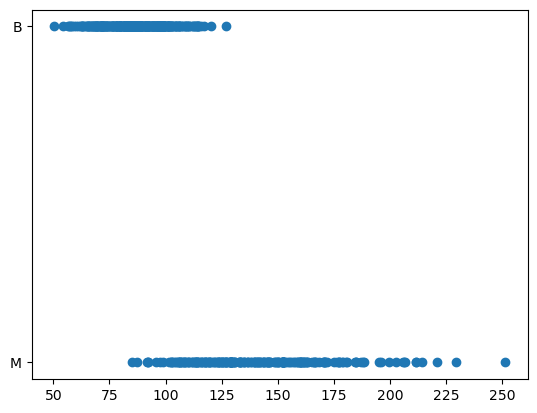

In [47]:
plt.scatter(x='perimeter_worst', y='diagnosis', data=df)

In [18]:
df.query('perimeter_worst > 200')
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
82     8611555         M        25.22         24.91           171.5   
108      86355         M        22.27         19.67           152.8   
180     873592         M        27.22         21.87           182.1   
236   88299702         M        23.21         26.97           153.5   
265   88995002         M        20.73         31.12           135.7   
339      89812         M        23.51         24.27           155.1   
352     899987         M        25.73         17.46           174.2   
461  911296202         M        27.42         26.27           186.9   
503     915143         M        23.09         19.83           152.1   
521   91762702         M        24.63         21.60           165.5   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
82      1878.0          0.10630            0.2665          0.3339   
108     1509.0          0.13260            0.2768          0.4264   
180     2250.0          0.10940            0.1914          0.2871   
236     1670.0          0.09509            0.1682          0.1950   
265     1419.0          0.09469            0.1143          0.1367   
339     1747.0          0.10690            0.1283          0.2308   
352     2010.0          0.11490            0.2363          0.3368   
461     2501.0          0.10840            0.1988          0.3635   
503     1682.0          0.09342            0.1275          0.1676   
521     1841.0          0.10300            0.2106          0.2310   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
82          0.1829                 0.06782     0.8973      1.4740   
108         0.2556                 0.07039     1.2150      1.5450   
180         0.1800                 0.05770     0.8361      1.4810   
236         0.1909                 0.06309     1.0580      0.9635   
265         0.1769                 0.05674     1.1720      1.6170   
339         0.1797                 0.05506     1.0090      0.9245   
352         0.1956                 0.06121     0.9948      0.8509   
461         0.2061                 0.05623     2.5470      1.3060   
503         0.1505                 0.05484     1.2910      0.7452   
521         0.1991                 0.06739     0.9915      0.9004   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
82          7.382    120.0       0.008166         0.05693       0.05730   
108        10.050    170.0       0.006515         0.08668       0.10400   
180         5.820    128.7       0.004631         0.02537       0.03109   
236         7.247    155.8       0.006428         0.02863       0.04497   
265         7.749    199.7       0.004551         0.01478       0.02143   
339         6.462    164.1       0.006292         0.01971       0.03582   
352         7.222    153.1       0.006369         0.04243       0.04266   
461        18.650    542.2       0.007650         0.05374       0.08055   
503         9.635    180.2       0.005753         0.03356       0.03976   
521         7.050    139.9       0.004989         0.03212       0.03571   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
82       0.01065              0.005893         30.00          33.62   
108      0.03112              0.005037         28.40          28.01   
180      0.01575              0.002747         33.12          32.85   
236      0.01590              0.003053         31.01          34.51   
265      0.01367              0.002299         32.49          47.16   
339      0.01479              0.003118         30.67          30.73   
352      0.02335              0.003385         33.13          23.58   
461      0.01697              0.004558         36.04          31.37   
503      0.02201              0.002897         30.79          23.87   
521      0.01879              0.004760         29.92          26.93   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
82             211.7      256

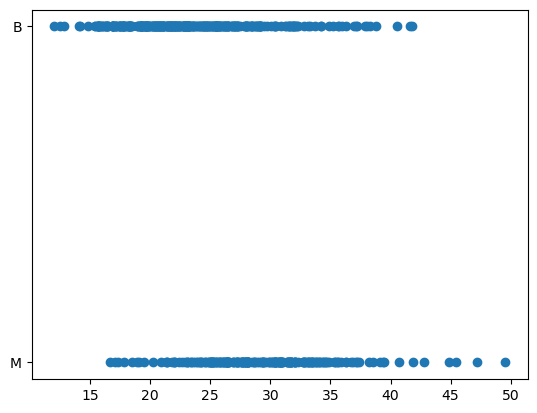

In [49]:
plt.scatter(x='texture_worst', y='diagnosis', data=df)

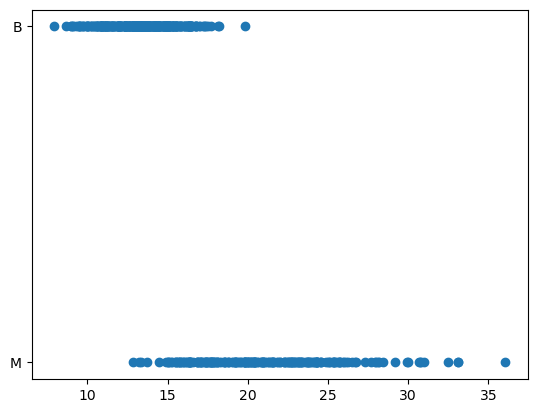

In [50]:
plt.scatter(x='radius_worst', y='diagnosis', data=df)

In [134]:
df.query('radius_worst > 30')
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
180     873592         M        27.22         21.87           182.1   
236   88299702         M        23.21         26.97           153.5   
265   88995002         M        20.73         31.12           135.7   
339      89812         M        23.51         24.27           155.1   
352     899987         M        25.73         17.46           174.2   
368    9011971         M        21.71         17.25           140.9   
461  911296202         M        27.42         26.27           186.9   
503     915143         M        23.09         19.83           152.1   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
180     2250.0          0.10940           0.19140          0.2871   
236     1670.0          0.09509           0.16820          0.1950   
265     1419.0          0.09469           0.11430          0.1367   
339     1747.0          0.10690           0.12830          0.2308   
352     2010.0          0.11490           0.23630          0.3368   
368     1546.0          0.09384           0.08562          0.1168   
461     2501.0          0.10840           0.19880          0.3635   
503     1682.0          0.09342           0.12750          0.1676   

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
180              0.18780         0.1800                 0.05770     0.8361   
236              0.12370         0.1909                 0.06309     1.0580   
265              0.08646         0.1769                 0.05674     1.1720   
339              0.14100         0.1797                 0.05506     1.0090   
352              0.19130         0.1956                 0.06121     0.9948   
368              0.08465         0.1717                 0.05054     1.2070   
461              0.16890         0.2061                 0.05623     2.5470   
503              0.10030         0.1505                 0.05484     1.2910   

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
180      1.4810         5.820    128.7       0.004631         0.02537   
236      0.9635         7.247    155.8       0.006428         0.02863   
265      1.6170         7.749    199.7       0.004551         0.01478   
339      0.9245         6.462    164.1       0.006292         0.01971   
352      0.8509         7.222    153.1       0.006369         0.04243   
368      1.0510         7.733    224.1       0.005568         0.01112   
461      1.3060        18.650    542.2       0.007650         0.05374   
503      0.7452         9.635    180.2       0.005753         0.03356   

     concavity_se  symmetry_se  fractal_dimension_se  radius_worst  \
180       0.03109      0.01575              0.002747         33.12   
236       0.04497      0.01590              0.003053         31.01   
265       0.02143      0.01367              0.002299         32.49   
339       0.03582      0.01479              0.003118         30.67   
352       0.04266      0.02335              0.003385         33.13   
368       0.02096      0.01263              0.001803         30.75   
461       0.08055      0.01697              0.004558         36.04   
503       0.03976      0.02201              0.002897         30.79   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
180          32.85            220.8      3216.0            0.1472   
236          34.51            206.0      2944.0            0.1481   
265          47.16            214.0      3432.0            0.1401   
339          30.73            202.4      2906.0            0.1515   
352          23.58            229.3      3234.0            0.1530   
368          26.44            199.5      3143.0            0.1363   
461          31.37            251.2      4254.0            0.1357   
503          23.87            211.5      2782.0            0.1199   

     compactness_worst  concavity_worst  symmetry_worst  \
180             0.4034           0.5340          0.2856   
236             0.

In [136]:
df.query("diagnosis == 'B' & radius_worst > 19")
#91376702

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
491  91376702         B        17.85         13.23           114.6      992.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
491          0.07838           0.06217         0.04445              0.04178   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
491          0.122                 0.05243     0.4834       1.046   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
491         3.163    50.95       0.004369        0.008274       0.01153   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
491      0.01302              0.001309         19.82          18.42   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
491            127.1      1210.0           0.09862            0.09976   

     concavity_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32  \
491           0.1048          0.1783                  0.05871          NaN   

     concave_points_worst  concave_points_se  
491               0.08341           0.007437

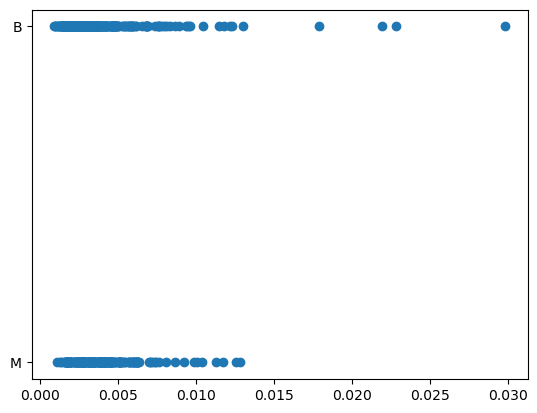

In [59]:
plt.scatter(x='fractal_dimension_se', y='diagnosis', data=df)
#no effect on diagnosis whatsoever

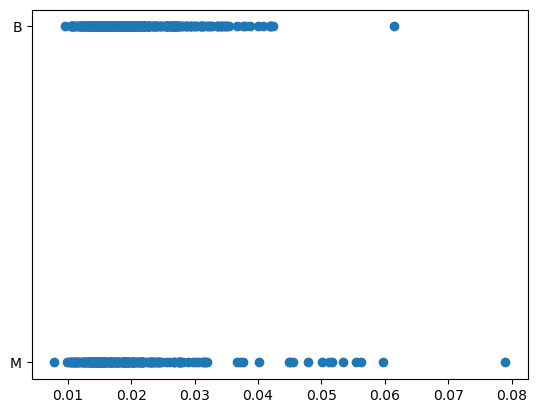

In [60]:
plt.scatter(x='symmetry_se', y='diagnosis', data=df)

In [137]:
df.query("symmetry_se > 0.058")
#84348301, 8610862, 894047

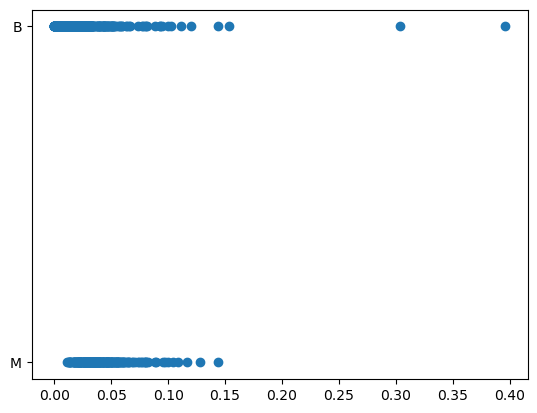

In [65]:
plt.scatter(x='concavity_se', y='diagnosis', data=df)
#no effect on diagnosis whatsoever

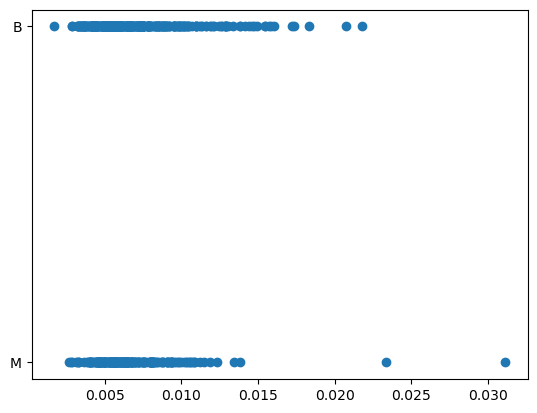

In [66]:
plt.scatter(x='smoothness_se', y='diagnosis', data=df)

In [68]:
df.query("smoothness_se > 0.020")
#pretty strange, MAYBE drop

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
122     865423         M       24.250         20.20          166.20   
213  881094802         M       17.420         25.56          114.50   
314     894047         B        8.597         18.60           54.09   
505     915276         B        9.676         13.14           64.12   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
122     1761.0           0.1447           0.28670          0.4268   
213      948.0           0.1006           0.11460          0.1682   
314      221.2           0.1074           0.05847          0.0000   
505      272.5           0.1255           0.22040          0.1188   

     concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
122              0.20120         0.2655                 0.06877     1.5090   
213              0.06597         0.1308                 0.05866     0.5296   
314              0.00000         0.2163                 0.07359     0.3368   
505              0.07038         0.2057                 0.09575     0.2744   

     texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
122       3.120         9.807   233.00        0.02333         0.09806   
213       1.667         3.767    58.53        0.03113         0.08555   
314       2.777         2.222    17.81        0.02075         0.01403   
505       1.390         1.787    17.67        0.02177         0.04888   

     concavity_se  symmetry_se  fractal_dimension_se  radius_worst  \
122       0.12780      0.04547              0.009875        26.020   
213       0.14380      0.02175              0.012560        18.070   
314       0.00000      0.06146              0.006820         8.952   
505       0.05189      0.02632              0.011480        10.600   

     texture_worst  perimeter_worst  area_worst  smoothness_worst  \
122          23.99           180.90      2073.0            0.1696   
213          28.07           120.40      1021.0            0.1243   
314          22.44            56.65       240.1            0.1347   
505          18.04            69.47       328.1            0.2006   

     compactness_worst  concavity_worst  symmetry_worst  \
122            0.42440           0.5803          0.3222   
213            0.17930           0.2803          0.1603   
314            0.07767           0.0000          0.3142   
505            0.36630           0.2913          0.2848   

     fractal_dimension_worst  Unnamed: 32  concave_points_worst  \
122                  0.08009          NaN                0.2248   
213                  0.06818          NaN                0.1099   
314                  0.08116          NaN                0.0000   
505                  0.13640          NaN                0.1075   

     concave_points_se  
122            0.01822  
213            0.03927  
314            0.00000  
505            0.01450

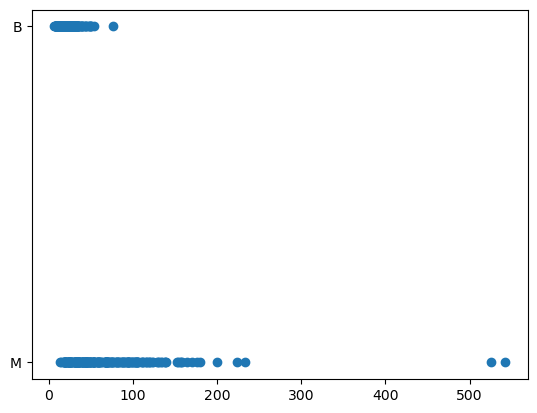

In [69]:
plt.scatter(x='area_se', y='diagnosis', data=df)

In [19]:
df.query("area_se > 200")
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
122     865423         M        24.25         20.20           166.2   
212    8810703         M        28.11         18.47           188.5   
368    9011971         M        21.71         17.25           140.9   
461  911296202         M        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
122     1761.0          0.14470           0.28670          0.4268   
212     2499.0          0.11420           0.15160          0.3201   
368     1546.0          0.09384           0.08562          0.1168   
461     2501.0          0.10840           0.19880          0.3635   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
122         0.2655                 0.06877      1.509       3.120   
212         0.1648                 0.05525      2.873       1.476   
368         0.1717                 0.05054      1.207       1.051   
461         0.2061                 0.05623      2.547       1.306   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
122         9.807    233.0       0.023330         0.09806       0.12780   
212        21.980    525.6       0.013450         0.02772       0.06389   
368         7.733    224.1       0.005568         0.01112       0.02096   
461        18.650    542.2       0.007650         0.05374       0.08055   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
122      0.04547              0.009875         26.02          23.99   
212      0.04783              0.004476         28.11          18.47   
368      0.01263              0.001803         30.75          26.44   
461      0.01697              0.004558         36.04          31.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
122            180.9      2073.0            0.1696             0.4244   
212            188.5      2499.0            0.1142             0.1516   
368            199.5      3143.0            0.1363             0.1628   
461            251.2      4254.0            0.1357             0.4256   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
122           0.5803          0.3222                  0.08009   
212           0.3201          0.1648                  0.05525   
368           0.2861          0.2510                  0.06494   
461           0.6833          0.2641                  0.07427   

     concave_points_worst  concave_points_se  concave_points_mean  
122                0.2248            0.01822              0.20120  
212                0.1595            0.01407              0.15950  
368                0.1820            0.01197              0.08465  
461                0.2625            0.02598              0.16890

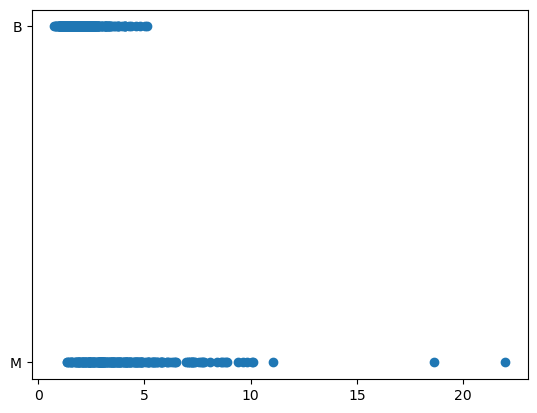

In [71]:
plt.scatter(x='perimeter_se', y='diagnosis', data=df)

In [20]:
df.query("perimeter_se > 10")
#get rid of all MAYBE 

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
12      846226         M        19.17         24.80           132.4   
108      86355         M        22.27         19.67           152.8   
212    8810703         M        28.11         18.47           188.5   
258     887181         M        15.66         23.20           110.2   
461  911296202         M        27.42         26.27           186.9   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
12      1123.0           0.0974            0.2458          0.2065   
108     1509.0           0.1326            0.2768          0.4264   
212     2499.0           0.1142            0.1516          0.3201   
258      773.5           0.1109            0.3114          0.3176   
461     2501.0           0.1084            0.1988          0.3635   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
12          0.2397                 0.07800     0.9555       3.568   
108         0.2556                 0.07039     1.2150       1.545   
212         0.1648                 0.05525     2.8730       1.476   
258         0.2495                 0.08104     1.2920       2.454   
461         0.2061                 0.05623     2.5470       1.306   

     perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  \
12          11.07    116.2       0.003139         0.08297       0.08890   
108         10.05    170.0       0.006515         0.08668       0.10400   
212         21.98    525.6       0.013450         0.02772       0.06389   
258         10.12    138.5       0.012360         0.05995       0.08232   
461         18.65    542.2       0.007650         0.05374       0.08055   

     symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
12       0.04484              0.012840         20.96          29.94   
108      0.03112              0.005037         28.40          28.01   
212      0.04783              0.004476         28.11          18.47   
258      0.02337              0.006042         19.85          31.64   
461      0.01697              0.004558         36.04          31.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
12             151.7      1332.0            0.1037             0.3903   
108            206.8      2360.0            0.1701             0.6997   
212            188.5      2499.0            0.1142             0.1516   
258            143.7      1226.0            0.1504             0.5172   
461            251.2      4254.0            0.1357             0.4256   

     concavity_worst  symmetry_worst  fractal_dimension_worst  \
12            0.3639          0.3176                  0.10230   
108           0.9608          0.4055                  0.09789   
212           0.3201          0.1648                  0.05525   
258           0.6181          0.3277                  0.10190   
461           0.6833          0.2641                  0.07427   

     concave_points_worst  concave_points_se  concave_points_mean  
12                 0.1767            0.04090               0.1118  
108                0.2910            0.02480               0.1823  
212                0.1595            0.01407               0.1595  
258                0.2462            0.03024               0.1377  
461                0.2625            0.02598               0.1689

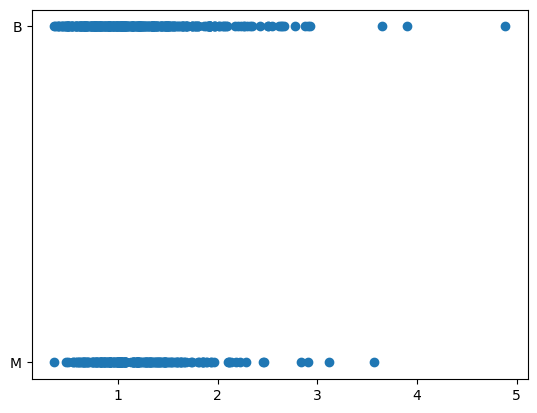

In [10]:
plt.scatter(x='texture_se', y='diagnosis', data=df)
#not very trustable

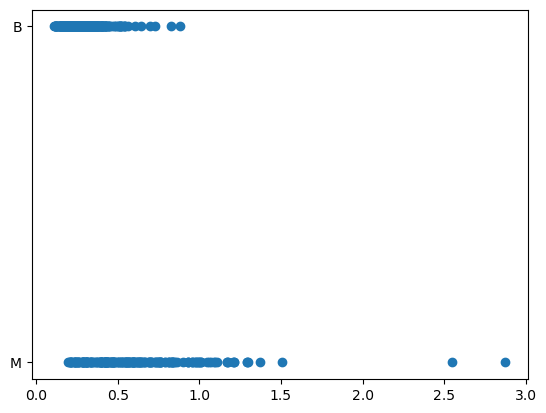

In [11]:
plt.scatter(x='radius_se', y='diagnosis', data=df)

In [17]:
df.query("radius_se > 2.5")
#8810703, 911296202

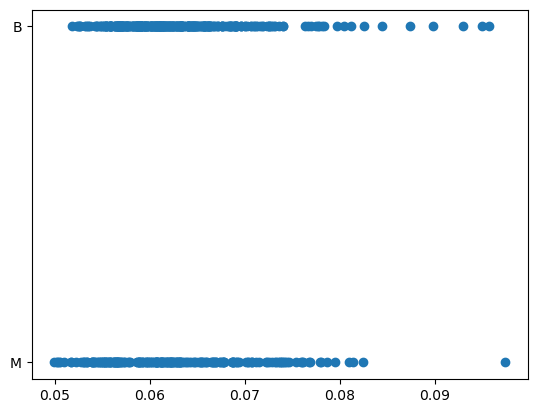

In [18]:
plt.scatter(x='fractal_dimension_mean', y='diagnosis', data=df)
#not very trustable

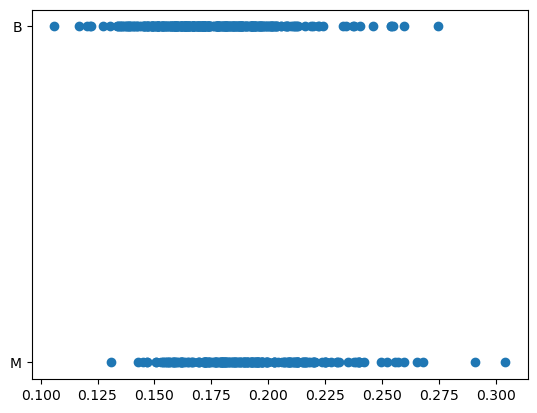

In [19]:
plt.scatter(x='symmetry_mean', y='diagnosis', data=df)

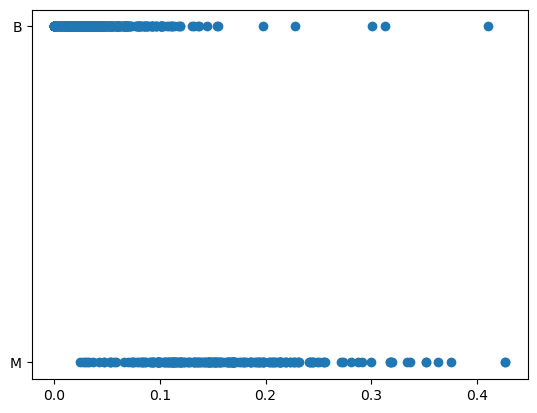

In [20]:
plt.scatter(x='concavity_mean', y='diagnosis', data=df)

In [22]:
df.query("concavity_mean > 0.4")
#8710441

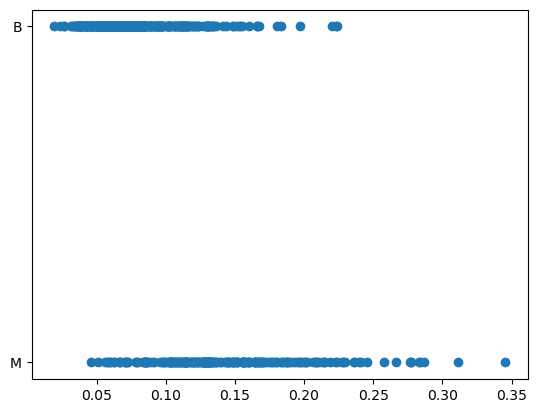

In [23]:
plt.scatter(x='compactness_mean', y='diagnosis', data=df)

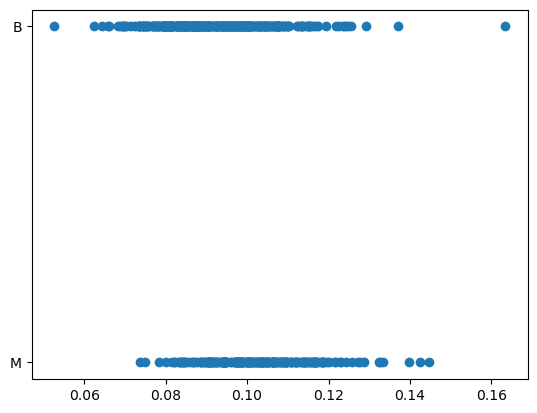

In [24]:
plt.scatter(x='smoothness_mean', y='diagnosis', data=df)
#not very trustable

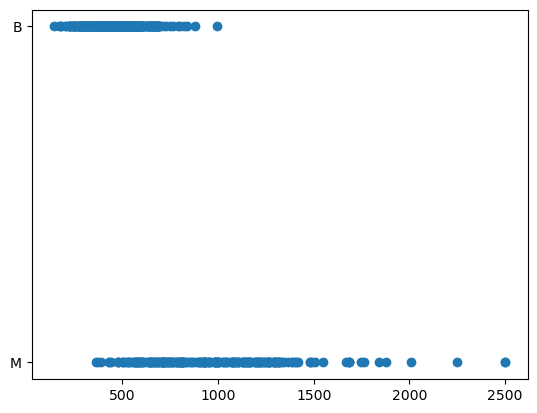

In [25]:
plt.scatter(x='area_mean', y='diagnosis', data=df)

In [28]:
df.query("area_mean > 2000")
#873592, 8810703, 899987, 911296202

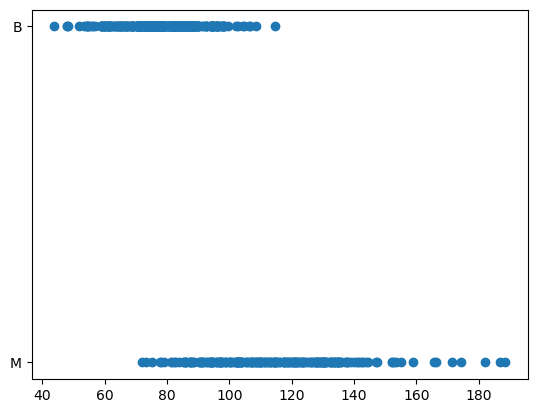

In [29]:
plt.scatter(x='perimeter_mean', y='diagnosis', data=df)

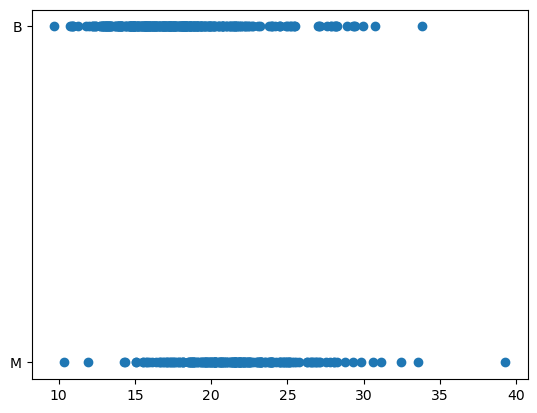

In [30]:
plt.scatter(x='texture_mean', y='diagnosis', data=df)
#not very trustable

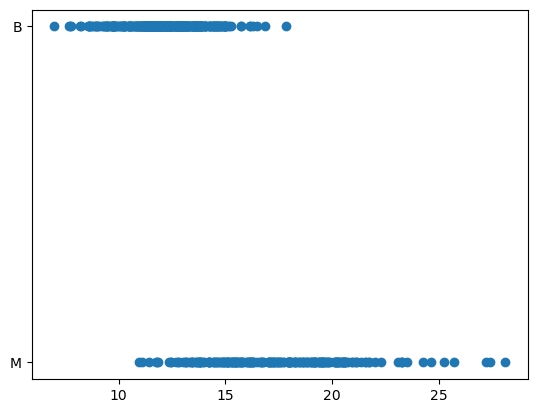

In [31]:
plt.scatter(x='radius_mean', y='diagnosis', data=df)

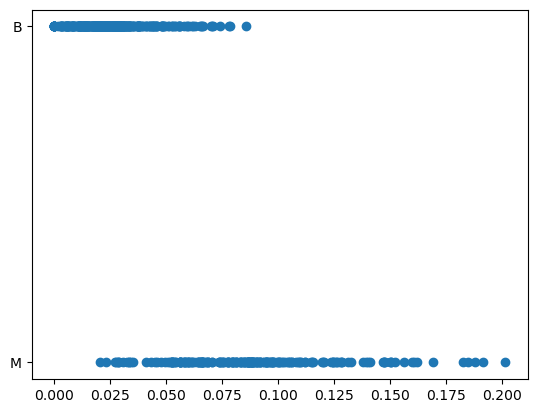

In [36]:
plt.scatter(x='concave_points_mean', y='diagnosis', data=df)

In [8]:
outliers = ['874858', '84348301', '84501001', '84348301', '8611555', '86355', '873593', '84501001', '84348301',
'859471', '84501001', '925622', '84501001', '851509', '8611555', '873592', '88299702',
'88995002', '89812', '899987', '9011971', '911296202', '915143', '91762702',
'8611555', '86355', '873592', '88299702', '88995002', '89812', '899987', '911296202', '915143',
'91762702', '873592', '88299702', '88995002', '89812', '899987', '9011971', '911296202',
'915143', '91376702', '84348301', '8610862', '894047', '865423', '881094802', '894047',
'915276', '865423', '8810703', '9011971', '911296202', '846226', '86355', '8810703', '887181',
'911296202', '8810703', '911296202', '8710441', '873592', '8810703', '899987', '911296202']

outliers = list(dict.fromkeys(outliers))

### 4.2) Boxplots

Separating features by measures (mean, se, worst)

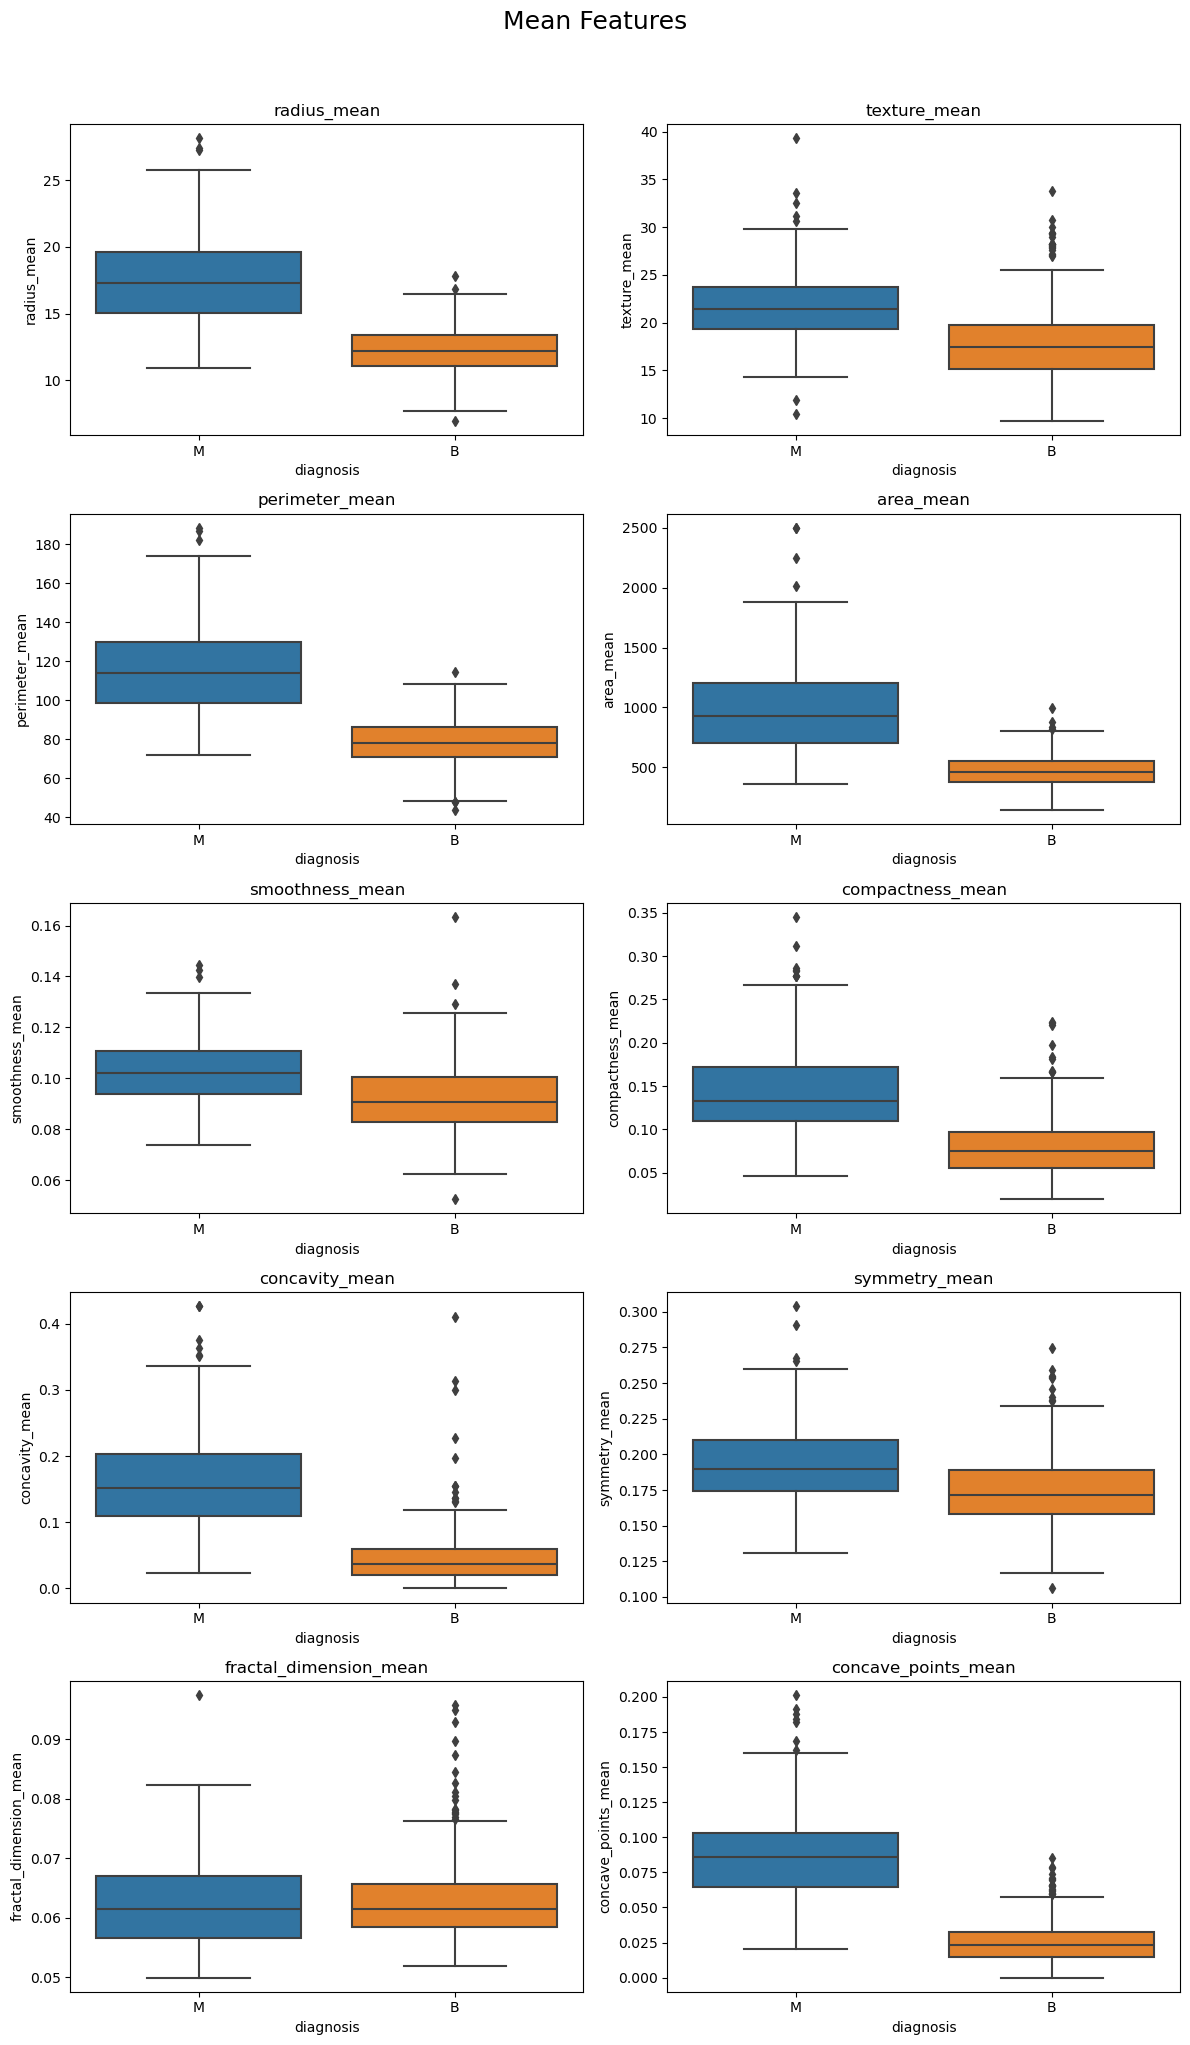

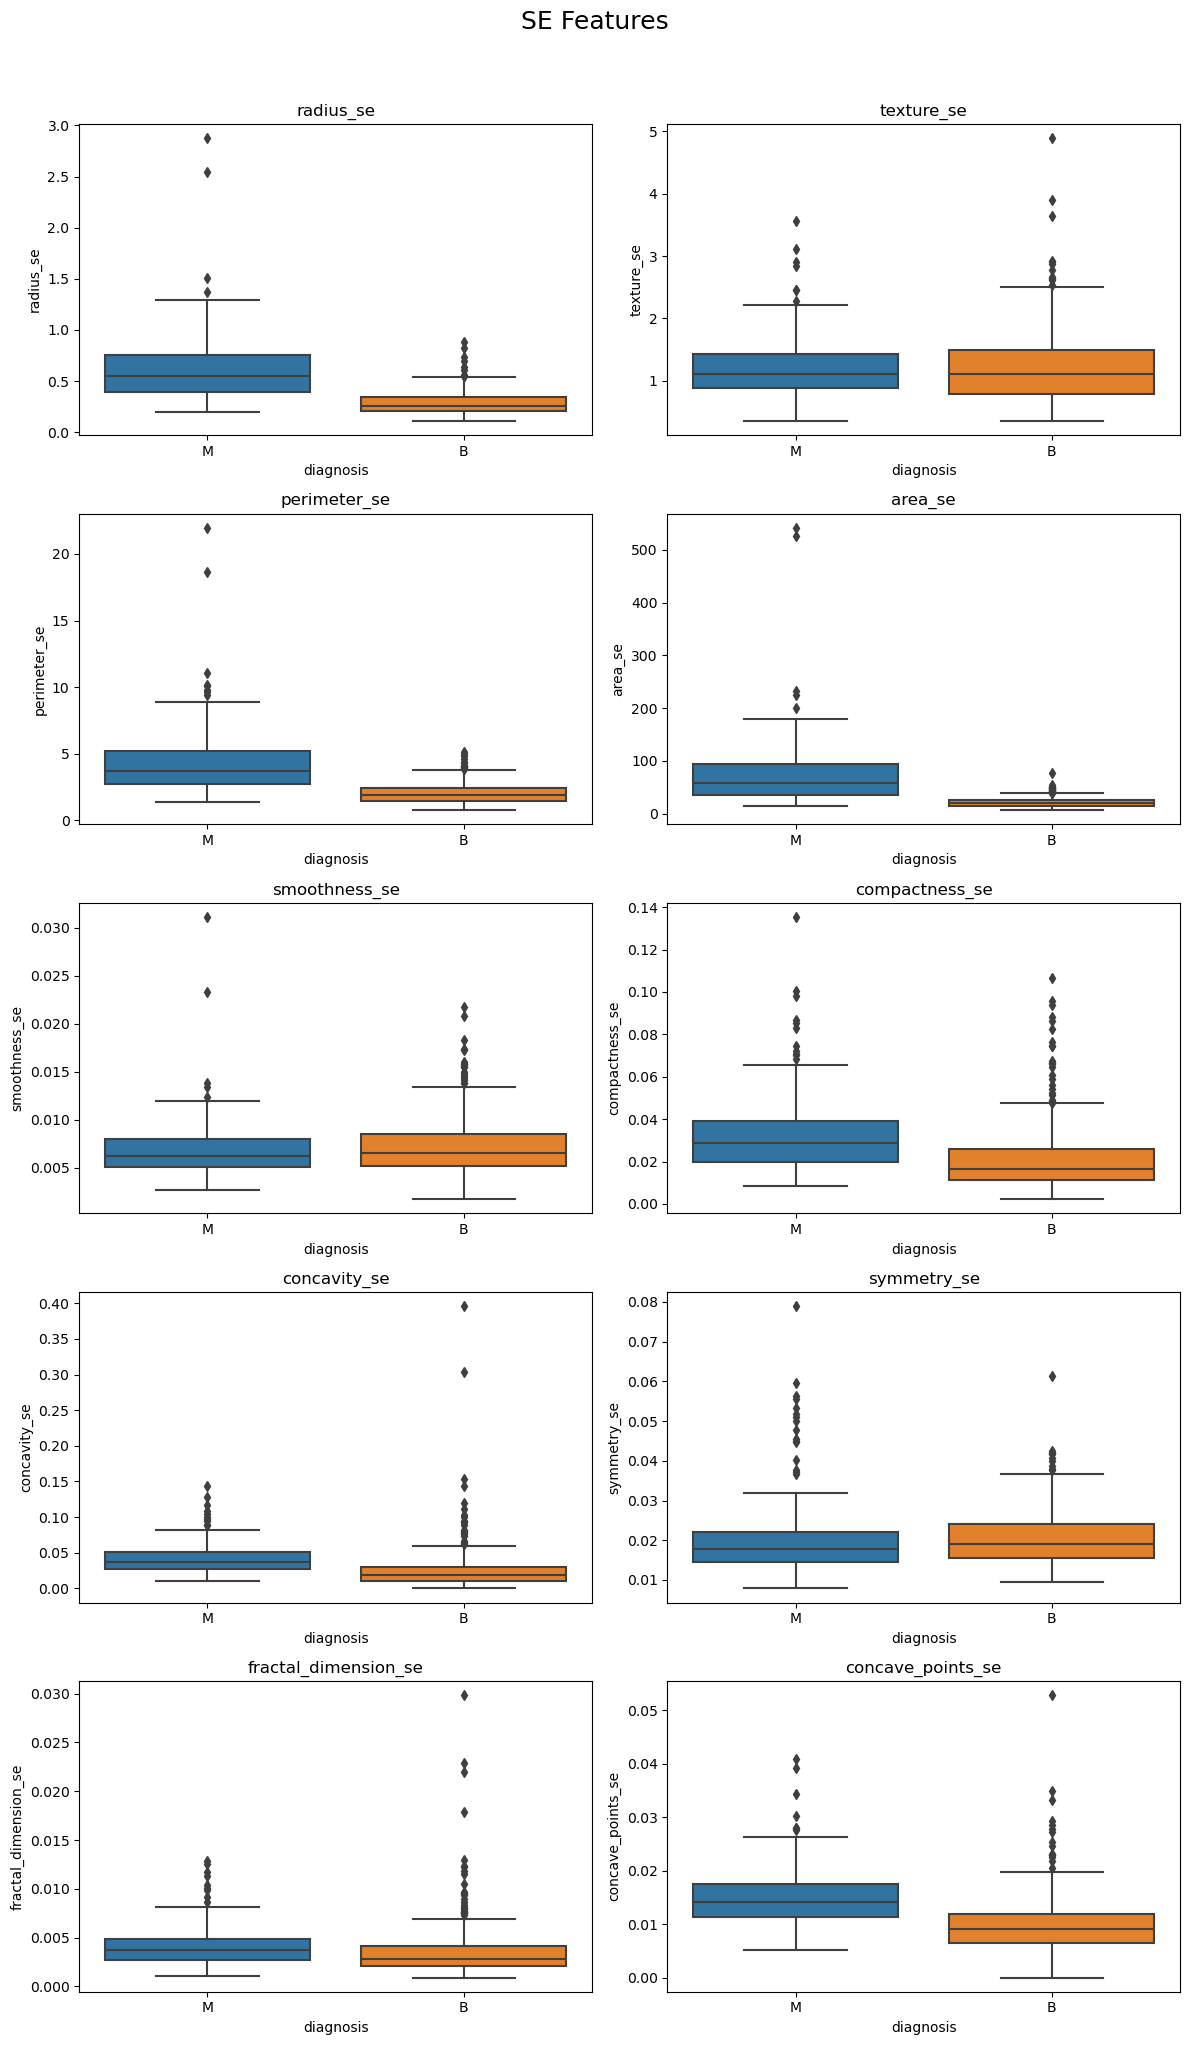

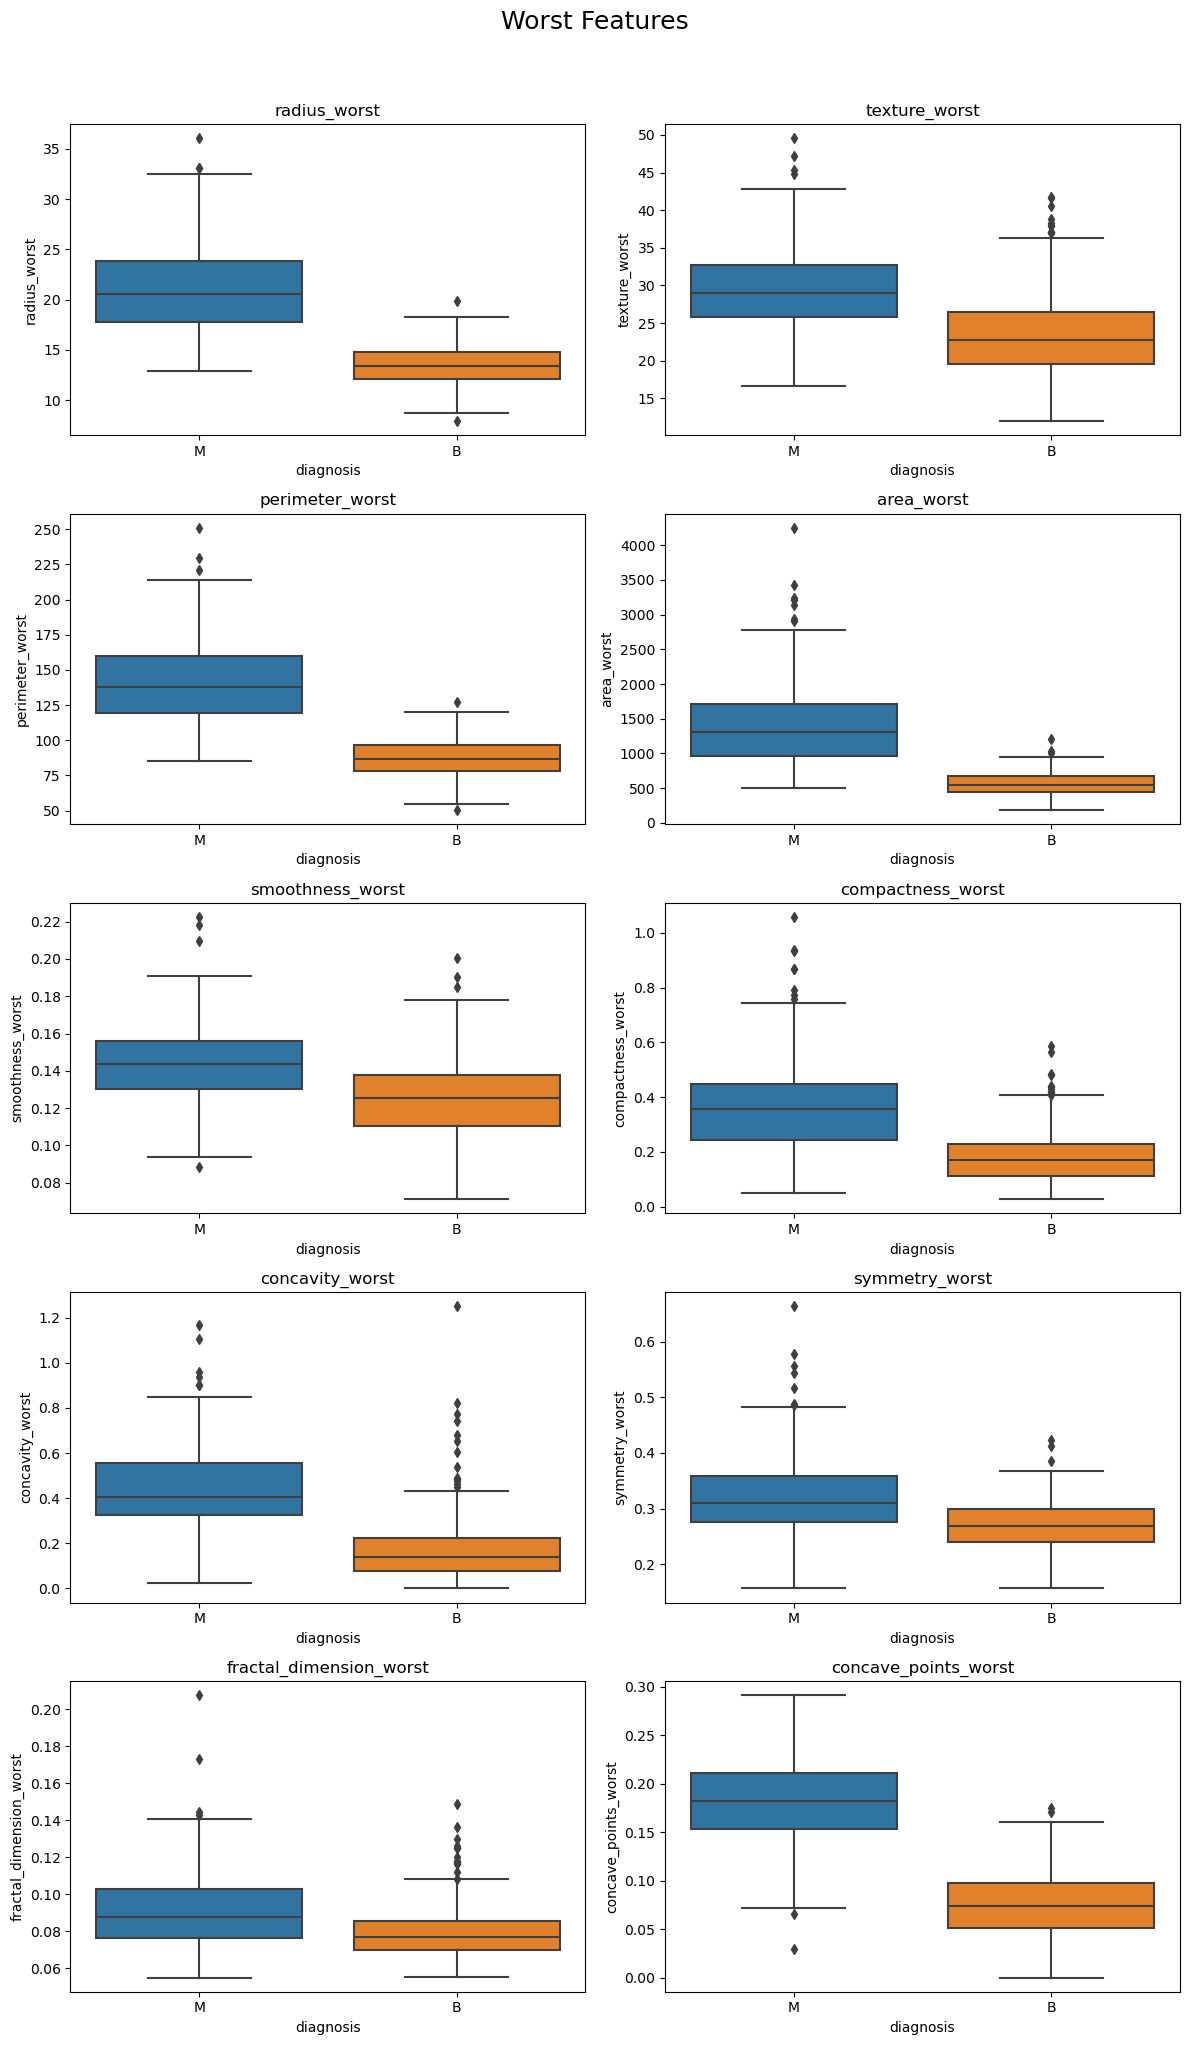

In [9]:
features_to_plot = df.drop(columns=['id', 'diagnosis'])

mean_features  = [f for f in features_to_plot if f.endswith('_mean')]
se_features    = [f for f in features_to_plot if f.endswith('_se')]
worst_features = [f for f in features_to_plot if f.endswith('_worst')]

# --- Função para criar grid 2xN ---
def plot_grid(features, title):
    cols = 2
    rows = math.ceil(len(features) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axes = axes.flatten()

    for i, feat in enumerate(features):
        sns.boxplot(x=df["diagnosis"], y=df[feat], ax=axes[i])
        axes[i].set_title(feat)

    fig.suptitle(title, fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

plot_grid(mean_features, "Mean Features")

plot_grid(se_features, "SE Features")

plot_grid(worst_features, "Worst Features")

### 4.3) Heatmaps

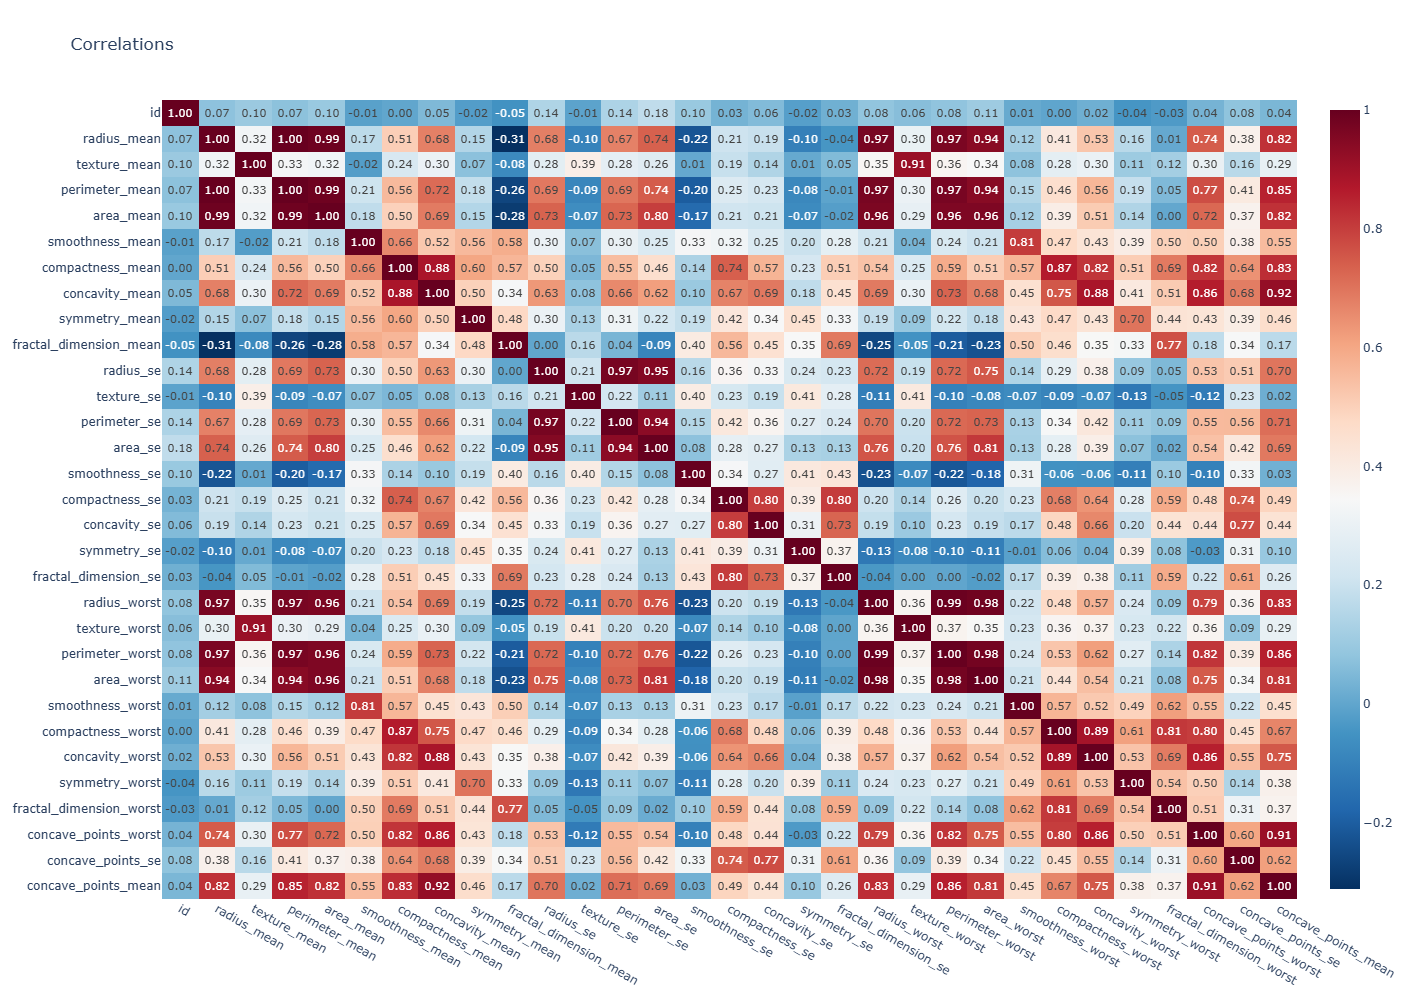

In [10]:
correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Correlations"
)

fig.update_layout(
    width=1400,
    height=1000,
)
fig.show()

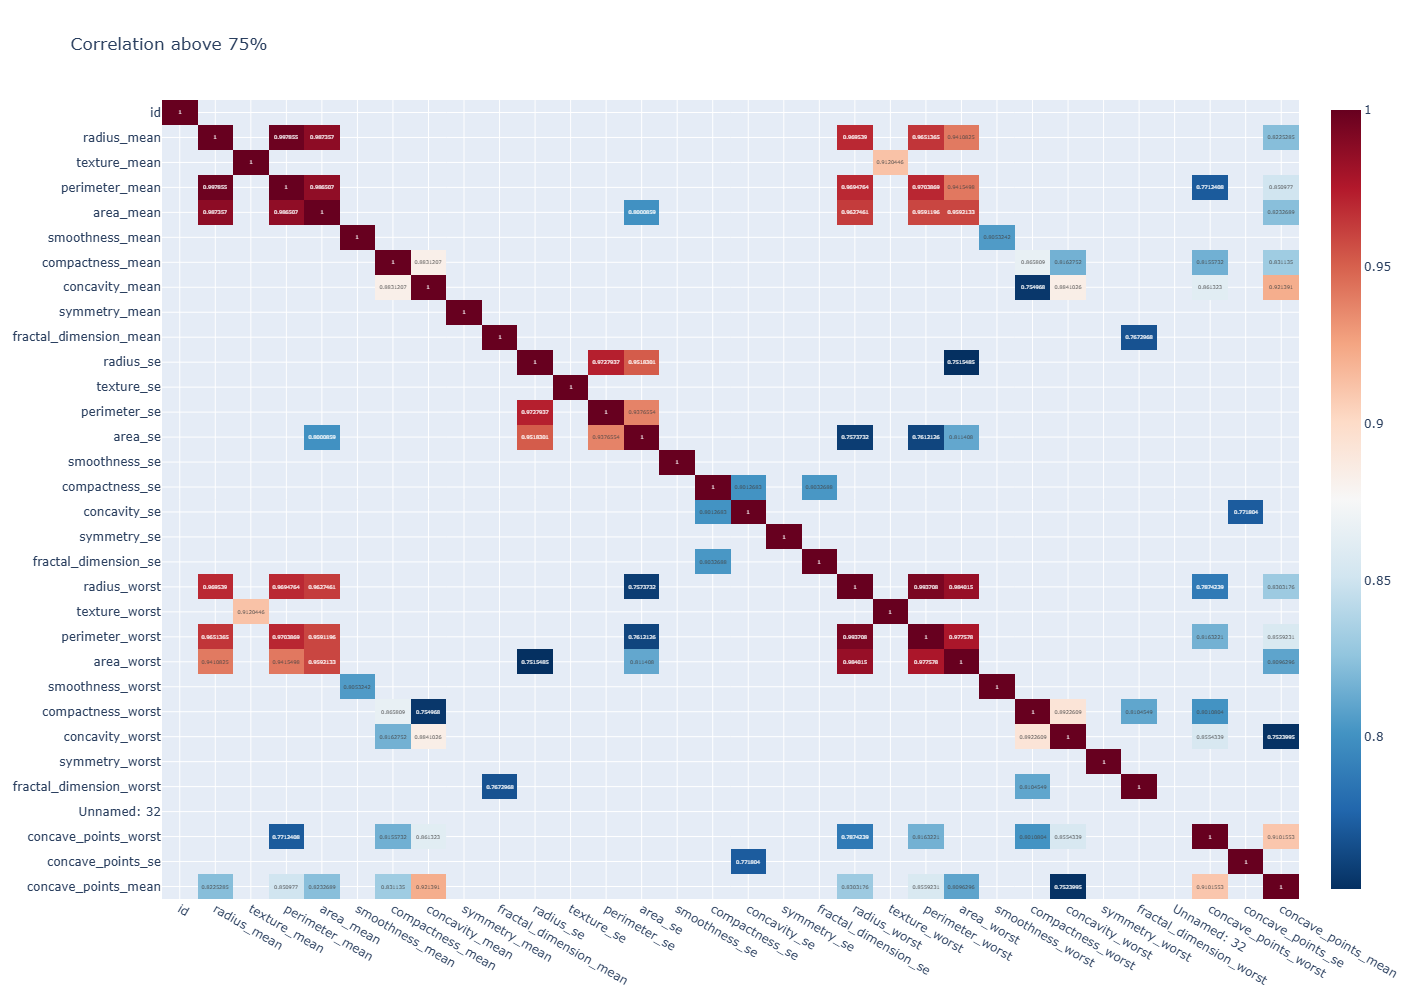

In [51]:
mask = correlation_matrix.abs() > 0.75

# aplica máscara e substitui valores baixos por NaN
filtered_corr = correlation_matrix.where(mask)

fig_filtered = px.imshow(
    filtered_corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Correlation above 75%"
)
fig_filtered.update_layout(
    width=1400,
    height=1000)
fig_filtered.show()

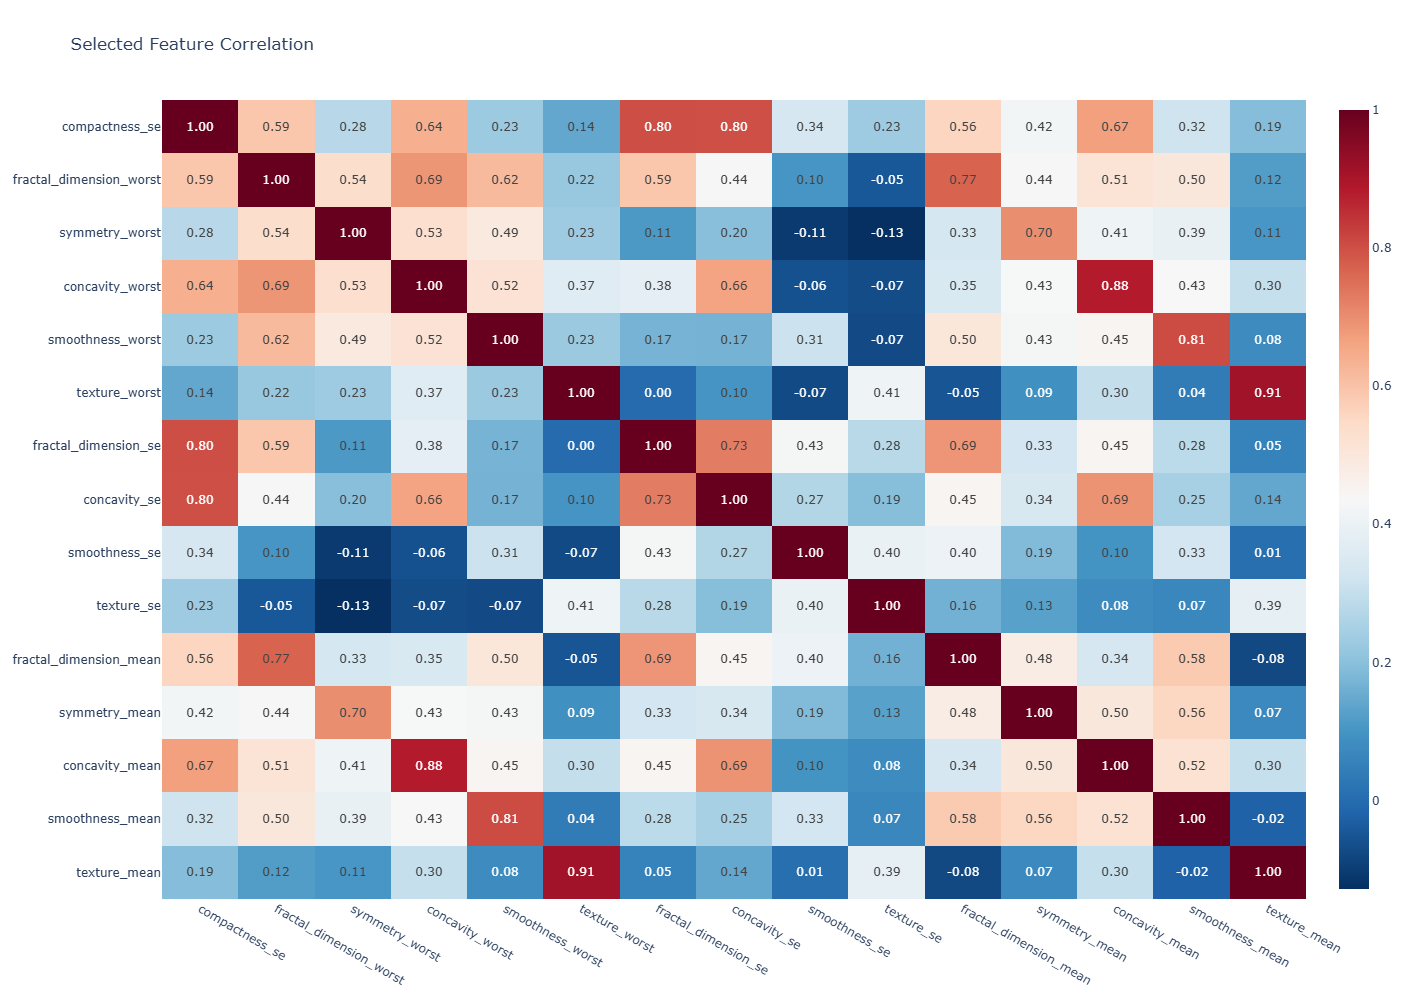

In [44]:
selected_features = [
    "compactness_se", "fractal_dimension_worst", "symmetry_worst",
    "concavity_worst", "smoothness_worst", "texture_worst",
    "fractal_dimension_se", "concavity_se", "smoothness_se",
    "texture_se", "fractal_dimension_mean", "symmetry_mean",
    "concavity_mean", "smoothness_mean", "texture_mean"
]

# Criar matriz de correlação só dessas features usando sua correlation_matrix
corr_selected = correlation_matrix.loc[selected_features, selected_features]

# Heatmap interativo com Plotly
fig_selected = px.imshow(
    corr_selected,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    aspect="auto",
    title="Selected Feature Correlation"
)

fig_selected.update_layout(
    width=1400,
    height=1000,
)
fig_selected.show()

### 4.4) VIF - Variance inflation factor

In [15]:
# VIF
X = df.select_dtypes(include=['float64', 'int64']).copy()

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar ordenado
vif.sort_values(by="VIF", ascending=False)

feature           VIF
1               radius_mean  63309.441555
3            perimeter_mean  58123.587378
19             radius_worst   9677.820028
21          perimeter_worst   4487.783848
4                 area_mean   1287.411538
22               area_worst   1139.047176
9    fractal_dimension_mean    629.688286
27  fractal_dimension_worst    423.466387
5           smoothness_mean    393.514898
23         smoothness_worst    375.678745
20            texture_worst    343.005975
2              texture_mean    251.432664
10                radius_se    237.257123
26           symmetry_worst    219.018071
12             perimeter_se    211.410744
6          compactness_mean    201.166758
8             symmetry_mean    184.429153
7            concavity_mean    157.899635
30      concave_points_mean    154.297834
28     concave_points_worst    148.786616
24        compactness_worst    132.994862
25          concavity_worst     86.311570
13                  area_se     73.436569
29        concave_points_se     54.030035
15           compactness_se     44.948568
17              symmetry_se     37.207715
16             concavity_se     33.254271
18     fractal_dimension_se     27.549724
14            smoothness_se     26.330278
11               texture_se     24.758627
0                        id      1.163246

## 5. Statistical Summary by Class

To complement the visual analysis, here we display descriptive statistics 
(mean, median, std) grouped by the diagnosis. Helping quantify the separation between malignant (M) and benign (B) tumors.

In [9]:
num_features = df.drop(columns=['id', 'diagnosis']).columns

# Mean values
display(df.groupby('diagnosis')[num_features].mean().round(3))

# Median values
display(df.groupby('diagnosis')[num_features].median().round(3))

# Standard deviation
display(df.groupby('diagnosis')[num_features].std().round(3))

radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                         
B               12.147        17.915          78.075    462.790   
M               17.463        21.605         115.365    978.376   

           smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
diagnosis                                                                     
B                    0.092             0.080           0.046          0.174   
M                    0.103             0.145           0.161          0.193   

           fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
diagnosis                                                                
B                           0.063      0.284       1.220         2.000   
M                           0.063      0.609       1.211         4.324   

           area_se  smoothness_se  compactness_se  concavity_se  symmetry_se  \
diagnosis                                                                      
B           21.135          0.007           0.021         0.026        0.021   
M           72.672          0.007           0.032         0.042        0.020   

           fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
diagnosis                                                                       
B                         0.004        13.380         23.515           87.006   
M                         0.004        21.135         29.318          141.370   

           area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                     
B             558.899             0.125              0.183            0.166   
M            1422.286             0.145              0.375            0.451   

           symmetry_worst  fractal_dimension_worst  concave_points_worst  \
diagnosis                                                                  
B                   0.270                    0.079                 0.074   
M                   0.323                    0.092                 0.182   

           concave_points_se  concave_points_mean  
diagnosis                                          
B                      0.010                0.026  
M                      0.015                0.088

radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                         
B               12.200         17.39           78.18      458.4   
M               17.325         21.46          114.20      932.0   

           smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
diagnosis                                                                     
B                    0.091             0.075           0.037          0.171   
M                    0.102             0.132           0.151          0.190   

           fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
diagnosis                                                                
B                           0.062      0.258       1.108         1.851   
M                           0.062      0.547       1.102         3.680   

           area_se  smoothness_se  compactness_se  concavity_se  symmetry_se  \
diagnosis                                                                      
B           19.630          0.007           0.016         0.018        0.019   
M           58.455          0.006           0.029         0.037        0.018   

           fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
diagnosis                                                                       
B                         0.003         13.35         22.820            86.92   
M                         0.004         20.59         28.945           138.00   

           area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                     
B               547.4             0.125              0.170            0.141   
M              1303.0             0.143              0.356            0.405   

           symmetry_worst  fractal_dimension_worst  concave_points_worst  \
diagnosis                                                                  
B                   0.269                    0.077                 0.074   
M                   0.310                    0.088                 0.182   

           concave_points_se  concave_points_mean  
diagnosis                                          
B                      0.009                0.023  
M                      0.014                0.086

radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                         
B                1.781         3.995          11.807    134.287   
M                3.204         3.779          21.855    367.938   

           smoothness_mean  compactness_mean  concavity_mean  symmetry_mean  \
diagnosis                                                                     
B                    0.013             0.034           0.043          0.025   
M                    0.013             0.054           0.075          0.028   

           fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
diagnosis                                                                
B                           0.007      0.113       0.589         0.771   
M                           0.008      0.345       0.483         2.569   

           area_se  smoothness_se  compactness_se  concavity_se  symmetry_se  \
diagnosis                                                                      
B            8.843          0.003           0.016         0.033        0.007   
M           61.355          0.003           0.018         0.022        0.010   

           fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
diagnosis                                                                       
B                         0.003         1.981          5.494           13.527   
M                         0.002         4.284          5.435           29.457   

           area_worst  smoothness_worst  compactness_worst  concavity_worst  \
diagnosis                                                                     
B             163.601             0.020              0.092            0.140   
M             597.968             0.022              0.170            0.182   

           symmetry_worst  fractal_dimension_worst  concave_points_worst  \
diagnosis                                                                  
B                   0.042                    0.014                 0.036   
M                   0.075                    0.022                 0.046   

           concave_points_se  concave_points_mean  
diagnosis                                          
B                      0.006                0.016  
M                      0.006                0.034

## 6) Conclusion

The dataset contains 29 numerical features (after removing `Id`, `diagnosis` and the empty column `Unnamed: 32`), with no missing values. 

Several outliers were detected across different features. Although many of them correspond to malignant cases (and therefore may carry useful signal), they must be handled carefully during preprocessing to avoid bias. These outliers were documented in the variable `outliers` for later inspection.

The analysis shows strong multicollinearity among features, especially between the `mean`, `se`, and `worst` versions of each measurement. This suggests that dimensionality reduction or feature selection techniques may be required in the modeling step.

The correlation matrix reveals strong relationships between tumor size–related features (such as perimeter, radius, concavity, and concave points), which are known to be highly predictive of the diagnosis. Meanwhile, the `selected_features` group appears to have weaker correlation with the target variable, and may contribute less to the classification task.

Overall, the dataset is well-structured and clean, but presents challenges such as feature redundancy and class imbalance (≈62% benign, 38% malignant). These findings will guide the next stages of preprocessing, model selection and evaluation.

### Top insights

1. Understanding Feature Groups (mean / se / worst)

The dataset provides three versions of each measurement:

- **_mean** → Average value of the measurement across the tumor boundary.
- **_se** → Standard error (variability) of the measurement.
- **_worst** → Maximum or “worst-case” value observed in a set of 10 frames.

These groups often behave as correlated clusters:
- `_mean` features capture the overall shape of the tumor.
- `_se` features capture variability and are typically noisier.
- `_worst` features tend to be the most relevant for classification tasks.

2. The dataset contains no missing values and is fully numerical after removing irrelevant columns.
3. Strong multicollinearity is present, especially among the `_mean`, `_se`, and `_worst` feature groups.
4. Statistical summaries and KDE plots show clear separation between benign and malignant tumors for size-related metrics such as radius, perimeter, area, concavity and concave points.
5. Standard error (`_se`) features tend to show weaker separation and greater noise.
6. Class imbalance is mild (≈62% benign, 38% malignant), suggesting the use of stratified cross-validation.
7. Outliers exist but many correspond to malignant tumors, meaning they contain valuable signal and should not be removed blindly.
8. Several features have extremely high correlation with the diagnosis (e.g., radius_worst, perimeter_worst, concave_points_worst), indicating strong predictive power.
9. VIF analysis reinforces the need for feature selection or dimensionality reduction in the modeling phase.